# OS 패키지 관련 예제

In [ ]:
import os
import shutil

In [ ]:
!pwd

# os.getcwd() #현재 수행하는 디렉토리 받아오기
# os.chdir(path) #해당하는 폴더로 수행 디렉토리 변경
# os.listdir(path='.')  #해당 폴더 내부의 파일/폴더의 리스트를 보여줌
# os.mkdir() --> os.makedirs()  :  폴더가 있어도 에러가 안나게 할 수 있음
# os.rmdir() --> shutil.rmtree() : 중간에 파일이 있는 경우
# os.rename --> os.renames()  :  중간에 임시 폴더를 만듦
# os.walk() :  폴더를 하위단까지 순회함
# os.path.join()  
# os.path.exists()

/content


https://docs.python.org/ko/3/library/os.html  

## 디렉토리 생성 및 기본 폴더 변경 (chdir 사용에 대한 라이브 코딩)

In [ ]:
os.makedirs('./test', exist_ok=True)  #  exist_ok 가 true 이면 폴더가 있어도 에러가 안남
os.chdir("./test")  #  현재 동작하는 폴더를 변경  
print(os.getcwd())


/content/test


In [ ]:
os.chdir("../")
os.makedirs('./test', exist_ok=False) # False로 놓으면 에러 발생

In [ ]:
os.makedirs('./test', exist_ok=True) # True 놓으면 에러 발생
print(os.getcwd())

/content


## **디렉토리 리스트 조회**

In [ ]:
list_files  =  sorted(os.listdir('./sample_data'))
print(list_files)
print(os.path.exists('./sample_data/' + list_files[0]))
print(os.path.isfile('./sample_data/' + list_files[1]))
print(os.path.isfile('./sample_data/' + list_files[3]))
print(os.path.isdir('./sample_data/' + list_files[3]))

NameError: ignored

## **폴더 생성과 삭제**

In [ ]:
os.makedirs('./test', exist_ok=True)
os.makedirs('./test/test', exist_ok=True)
os.rmdir('./test') # 폴더 내에 무언가 들어있으면 에러가 발생합니다..

In [ ]:
shutil.rmtree('./test') # shutil은 파일 복사 삭제 등의 고수준 기능을 지원하는 패키지입니다..

## 파일 이름 변경

In [ ]:
os.renames('./sample_data/README.md', './sample_data/READYOU.md')
os.renames('./sample_data/mnist_test.csv', './a.csv') # shutil.move 등 다양한 함수로 해당 기능을 만들어낼 수 있음

## **os.walk --> 폴더를 순회하는 Generator**

In [ ]:
for root, _, files in os.walk('./sample_data/'):
    for file in files:
        if(file.endswith(".md")):
            os.remove(os.path.join(root,file))

실습 1  :  본인의 특정 폴더에 있는 파일앞에 모두 test_ 를 붙여보기

실습 2: 본인의 특정 폴더에 있는 파일중 특정 확장자를 가진 파일만 다른 폴더로 옮겨보기

## 추가로 설명하고 싶은 것

In [39]:
# sorting
a = [2,3,4,1]
b = [2,3,4,1]

a.sort(reverse=True)
x = sorted(b, reverse=True)

print(a)
print(b)
print(x)

[4, 3, 2, 1]
[2, 3, 4, 1]
[4, 3, 2, 1]


In [40]:
# list comprehension
list_gen_with_for = []
for i in range(10):
  list_gen_with_for.append(i)

list_gen_with_comp = [x for x in range(10)]

print(list_gen_with_for)
print(list_gen_with_comp)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#  text tools (konlpy, word cloud, doc file)


##  Konlpy : https://konlpy-ko.readthedocs.io/ko/v0.4.3/

In [ ]:
!pip install konlpy # install 해야 함

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 460kB 39.1MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()

In [ ]:
text = "안녕하세요 저는 의료 인공지능에 종사하는 사람입니다."

print(kkma.nouns(text))
print(kkma.pos(text))
print(kkma.morphs(text))

['안녕', '저', '의료', '인공', '인공지능', '지능', '종사', '사람']
[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('저', 'NP'), ('는', 'JX'), ('의료', 'NNG'), ('인공지능', 'NNG'), ('에', 'JKM'), ('종사', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('사람', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
['안녕', '하', '세요', '저', '는', '의료', '인공지능', '에', '종사', '하', '는', '사람', '이', 'ㅂ니다', '.']


## Word cloud :  https://github.com/amueller/word_cloud

In [ ]:
word_cloud_text= '''
t wasn't long ago that real estate experts were bracing for the worst.
The coronavirus pandemic had sent large parts of the world into lockdown, shuttering businesses, costing tens of millions of workers their jobs and putting the housing market into a deep freeze. The number of people asking lenders for more time on their mortgage payments surged as the global recession hit.
"This time last year we thought it was going to be 2008 all over again," said Kate Everett-Allen, the head of international residential research at real estate consultancy Knight Frank.
The fear was that house prices would collapse, as they reliably had done in past economic downturns. An increase in bankruptcies and unemployment would squeeze disposable incomes and make it difficult for highly indebted homeowners to keep up with their mortgages.
Those fortunate enough to own second homes would be forced to sell to build up cash reserves, putting even more downward pressure on prices.
"Actually, none of that happened," added Everett-Allen.
Instead, house prices soared even as the world suffered its worst slump since the Great Depression. From New Zealand to the United States, Germany, China and Peru, the same phenomenon has taken hold: home prices are skyrocketing, and many buyers are panicking.
'''

In [ ]:
import wordcloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
wordcloud_example = wordcloud.WordCloud(max_font_size=40).generate(word_cloud_text)

(-0.5, 399.5, 199.5, -0.5)

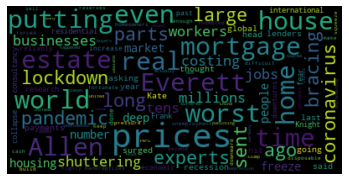

In [ ]:
fig = plt.figure()
plt.imshow(wordcloud_example, interpolation='bilinear')
plt.axis('off')

Homework 1 :  한글로 워드 클라우드 만들어보기 (wordcloud 인스턴스 생성시에 font_path를 지정하면 됩니다.)

## Doc 파일 읽기 : https://python-docx.readthedocs.io/en/latest/

In [ ]:
!pip install python-docx
from docx import Document

In [ ]:
doc = Document('./practice.docx')
text = [p.text for p in doc.paragraphs]

print(len(text))
print(text[2])

제목도 넣을 수 있고,  테이블도 만들수 있고 다양한 기능을 수행할 수 있습니다.

#  excel 데이터 조작(openpyxl) : https://openpyxl.readthedocs.io/en/stable/

In [ ]:
!pip install openpyxl # colab에는 이미 설치되어있음

In [43]:
import openpyxl
from openpyxl.comments import Comment
file_name = "excel_practice.xlsx"
book = openpyxl.load_workbook(file_name)
sheet = book["Practice"]


In [44]:
# 데이터 접근 방법의 2가지 종류 

print(sheet["A1"].value)  #  cell name
print(sheet.cell(1, 1).value) # cell location

Sample Data
Sample Data


In [45]:
sheet['A2'].value = 1000
sheet['A3'].value = 500   #  값 집어넣기
sheet['A2'].comment = Comment("author", "Hello world")  #  comment 넣기
sheet['A4'] = "=A2+A3" # 수식 넣기
sheet.merge_cells('A5:I10')

book.save("edited_"+ file_name)